<a href="https://colab.research.google.com/github/priya242/Data-Engineering/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import csv
import pandas

In [108]:
df = pandas.read_csv('/content/Oregon Hwy 26 Crash Data for 2019 - Crashes on Hwy 26 during 2019.csv')
print(df)

      Crash ID  ...  Participant Striker Flag
0      1809119  ...                       NaN
1      1809119  ...                       NaN
2      1809119  ...                       NaN
3      1809119  ...                       NaN
4      1809119  ...                       NaN
...        ...  ...                       ...
2734   1860771  ...                       NaN
2735   1860771  ...                       NaN
2736   1860771  ...                       NaN
2737   1860771  ...                       NaN
2738   1860771  ...                       NaN

[2739 rows x 157 columns]


0       1809119
1       1809119
2       1809119
3       1809119
4       1809119
         ...   
2734    1860771
2735    1860771
2736    1860771
2737    1860771
2738    1860771
Name: Crash ID, Length: 2739, dtype: int64

In [164]:
#1. existence assertions

print("Null values for Crash ID--",df['Crash ID'].isnull().sum())
print("Null values for Vehicle ID--",df['Vehicle ID'].isnull().sum())
print("Where year is null--" , df['Crash Year'].isnull().sum())
print("Where year is equal to 2019--" , df['Crash Year'].notnull().sum())

Null values for Crash ID-- 0
Null values for Vehicle ID-- 508
Where year is null-- 2231
Where year is equal to 2019-- 508


In [55]:
#2. limit assertions
#Crash month must be a valid month number (01-12)
 df['Crash Month'].isin([1,12])
#County code must be between (01-36).
(df['County Code'] > 36).sum()
(df['County Code'] < 1).sum()


0

In [60]:
# 3. intra-record check assertions. 
# Combination of month, day and year do not represent a valid date.
df1 = pandas.DataFrame({'mm': df['Crash Month'],
                   'dd': df['Crash Day'],
                   'yy': df['Crash Year']})
df2 = df1[["yy", "mm", "dd"]].copy()
df2.columns = ["year", "month", "day"]
date = pandas.to_datetime(df2)

if pandas.to_datetime(date, format='%b-%d-%Y', errors='coerce').notnull().all():
   print(date) 
#

In [88]:
#4. inter-record check assertions.
#Crash ID should not be exceeding 8 characters.
crashid = df['Crash ID']
for id in crashid : 
  y = str(id)
  if len(y) > 8 :
    print(y)
#School Zone is a one-digit code that indicates the crash occurred should be blank, 0,1 or 9
schoolId = df['School Zone Indicator']
if schoolId.all() != 1 and schoolId.all() != 0 and schoolId.all() != 9 :
  print(schoolId)

In [165]:
#5. Summary assertions.
#HighWay number should be 26.
highwayID = df['Highway Number']
count = 0
for id in highwayID :
  if id != 26 :
    count = count + 1
print(count)
#Participant Age must be eligible for driving
age = df['Age']
print((age > 18).sum())


2231
0


In [123]:
#6 referential integrity insertions.
#Every crash participant has a valid vehicle ID.
df[df['Record Type'].isin([2,3]) & df['Vehicle ID'].isnull()]
print("Doesn't have valid vehicle ID",df['Vehicle ID'].isnull().sum())

#Every crash participant has a valid participant ID.
df[df['Record Type'].isin([3]) & df['Participant ID'].isnull()]
print("Doesn't have valid participant ID",df['Participant ID'].isnull().sum())



Doesn't have valid vehicle ID 508
Doesn't have valid participant ID 1523


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


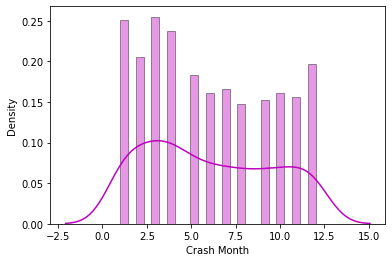

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


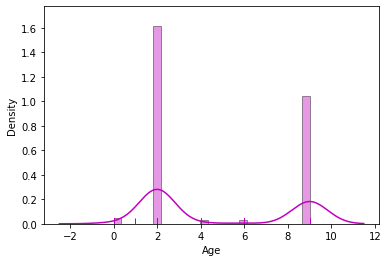

In [141]:
#7 statistical distribution assertions.
#Crashes are higher in number in the last 6 months
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = df['Crash Month']

ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()
#Average age is 30.
y = df['Age']

ax = sns.distplot(y, hist=True, kde=True, rug=True, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()
